In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline 

In [8]:
df = pd.read_csv('fuel_econ.csv')
print (df.shape)
df.head(3)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


In [9]:
df = df.sample(n=200)
print (df.shape)

(200, 20)


In [15]:
df['trans'].unique()

array(['Automatic 7-spd', 'Automatic (S8)', 'Automatic 8-spd',
       'Manual 6-spd', 'Automatic (AV-S7)', 'Automatic (AM-S6)',
       'Manual 5-spd', 'Automatic (S7)', 'Automatic (AM-S7)',
       'Automatic (S6)', 'Automatic (AV-S6)', 'Manual 7-spd',
       'Automatic (variable gear ratios)', 'Automatic (AV-S8)',
       'Automatic (AM6)', 'Automatic 5-spd', 'Automatic (AM7)',
       'Automatic 9-spd', 'Automatic (A1)', 'Automatic (S5)',
       'Automatic (AM-S8)', 'Automatic 6-spd', 'Automatic (AV-S10)',
       'Automatic 4-spd'], dtype=object)

In [24]:
df['trans'].apply(lambda x: 'Automatic' if 'Automatic' in x else 'Manual')

2236    Automatic
1400    Automatic
3171    Automatic
1689       Manual
2311       Manual
3451    Automatic
1342    Automatic
3222    Automatic
806        Manual
2138    Automatic
966        Manual
3487    Automatic
2771       Manual
2353    Automatic
2723    Automatic
1109    Automatic
2444    Automatic
2002       Manual
3622    Automatic
2170    Automatic
3240    Automatic
2726    Automatic
981     Automatic
1827       Manual
3311    Automatic
2687    Automatic
3813    Automatic
2455    Automatic
232     Automatic
3256    Automatic
          ...    
705     Automatic
938     Automatic
1055    Automatic
890        Manual
1248    Automatic
3458       Manual
1164       Manual
2025    Automatic
691     Automatic
502     Automatic
3557    Automatic
2692    Automatic
2472    Automatic
1790    Automatic
276     Automatic
2928    Automatic
2462    Automatic
3348    Automatic
2725    Automatic
2515    Automatic
1263    Automatic
3168    Automatic
558     Automatic
1645    Automatic
2947    Au

In [20]:
def trans_type(s):
    '''
    if trans contains Automatic than Automatic
    if trans contains Manual than Manual
    '''
    if 'Automatic' in s:
        return 'Automatic'
    if 'Manual' in s:
        return 'Manual'

In [22]:
df['trans_type'] = df['trans'].apply(trans_type)
df

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
2236,36527,Mercedes-Benz,AMG CLS63 S 4matic,2016,Compact Cars,4-Wheel Drive,Automatic 7-spd,Premium Gasoline,8,5.5,...,92,15.5983,19.4000,21.8254,30.3000,17.8960,496,4,4,Automatic
1400,34927,Bentley,Flying Spur,2015,Midsize Cars,All-Wheel Drive,Automatic (S8),Premium Gasoline,12,6.0,...,0,12.0228,14.4000,20.0478,26.7000,14.6643,604,3,3,Automatic
3171,38334,Dodge,Charger,2017,Large Cars,Rear-Wheel Drive,Automatic 8-spd,Regular Gasoline,6,3.6,...,105,19.0003,23.9000,30.0971,43.1000,22.7798,389,5,5,Automatic
1689,35363,Dodge,Challenger,2015,Midsize Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,8,5.7,...,0,15.1221,18.7000,23.3102,32.6000,17.9612,495,4,4,Manual
2311,36669,MINI,Cooper S Paceman All4,2016,Compact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,4,1.6,...,0,24.8910,32.1499,30.3179,43.4501,27.0716,327,6,6,Manual
3451,38879,Subaru,Impreza Sport 4-Door,2018,Midsize Cars,All-Wheel Drive,Automatic (AV-S7),Regular Gasoline,4,2.0,...,100,27.1281,35.4000,35.7879,52.3000,30.4430,291,7,7,Automatic
1342,34829,Bentley,Flying Spur,2015,Midsize Cars,All-Wheel Drive,Automatic (S8),Premium Gasoline,8,4.0,...,0,13.8190,17.3000,23.8488,31.8000,17.0447,517,4,4,Automatic
3222,38464,Ford,Fiesta FWD,2017,Subcompact Cars,Front-Wheel Drive,Automatic (AM-S6),Regular Gasoline,4,1.6,...,85,27.0000,36.1000,36.8746,54.1000,31.1253,286,7,7,Automatic
806,33805,Cadillac,ATS,2014,Compact Cars,Rear-Wheel Drive,Manual 6-spd,Regular Gasoline,4,2.0,...,91,19.3663,24.4000,29.2741,41.8000,22.8458,389,6,6,Manual
2138,36320,Maserati,Ghibli S RWD,2016,Midsize Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.0,...,108,16.2190,20.1528,23.4289,32.7793,18.8260,471,4,4,Automatic


## Non Positional Encodings for Third Variable
* Shape (Categorical)
* Size (Numerical)
* Color (Numerical and Categorical both)

### There are 4 major cases to consider when we want to plot 3 variables together:

1. 3 Numeric Variables
2. 2 Numeric and 1 Categorical Variables
3. 1 Numeric and 2 Categorical Variables
4. 3 Categorical Variables

### Encoding via Shape (2 Numerical and 1 Categorical)

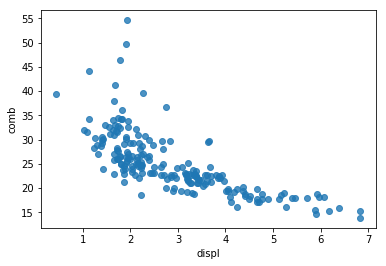

In [10]:
sns.regplot(data = df, x = 'displ', y='comb', x_jitter= 0.4, fit_reg=False)

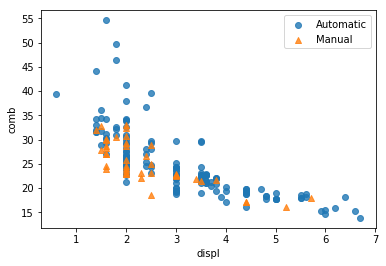

In [30]:
trans_type = [['Automatic', 'o'], ['Manual', '^']]

for trans, m in trans_type:
    plot_data = df[df['trans_type'] == trans]
    sns.regplot(data = plot_data, x = 'displ', y='comb', fit_reg=False, marker=m)
plt.legend(['Automatic', 'Manual'])

### Encoding via Size (3 Numerical)

s is the marker size keyword

Area of the points is associated with the value of inputs

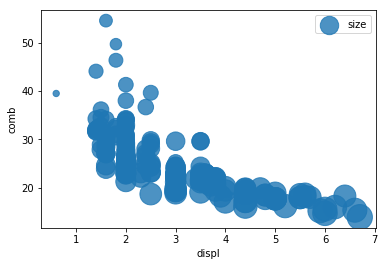

In [34]:
sns.regplot(data = df, x = 'displ', y='comb', fit_reg=False, scatter_kws={'s' : df['co2']})
plt.legend(['size'])
# Since only one scatter plot call is made it will only plot 1 point. 
# We have to find a workaround to plot the legend properly

We need to make dummy scatter plot sequences so that we can construct our legend properly. We will create a list to store all our dummy scatter plot objects

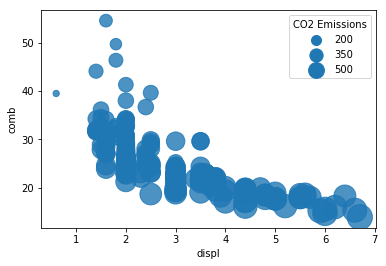

In [37]:
sizes = [200, 350, 500]
base_color = sns.color_palette()[0]
legend_objs = []
for s in sizes:
    legend_objs.append (plt.scatter([], [], s = s/2, color = base_color))
    # First 2 points are empty lists so points are plotted 
    
sns.regplot(data = df, x = 'displ', y='comb', fit_reg=False, scatter_kws={'s' : df['co2']})
plt.legend(legend_objs, sizes, title = 'CO2 Emissions')


In the legend function: 
- if there is only 1 argument it is assumed to be labels for plot object
- with 2 arguments, 1st is list of objects to be depicted in the legend and 2nd is list of labels

### Encoding via Color (Both Categorical and Numerical)

Color Palletes:
- Qualitative (no ordering is implied, every color is given the equal importance)
- Sequential (low values are highlighted by lighter colors or opposite)
- Divergent  (2 sequential palletes put back to back

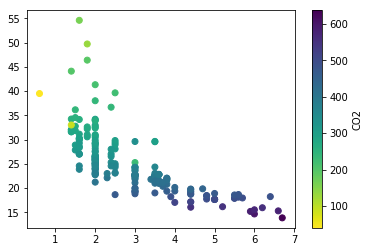

In [41]:
plt.scatter(data = df, x = 'displ', y='comb', c = 'co2', cmap = 'viridis_r')
plt.colorbar(label = 'CO2')

In [ ]:
plt.scatter(data = df, x = 'displ', y='comb', c = 'trans_type', cmap = 'viridis_r')
plt.colorbar(label = 'CO2')

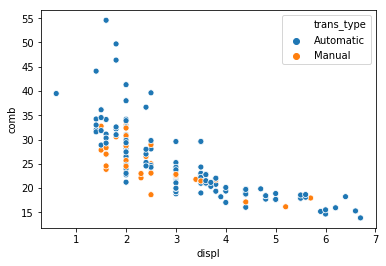

In [46]:
sns.scatterplot(data = df, x = 'displ', y= 'comb', hue='trans_type')

## Faceting in 2 directions

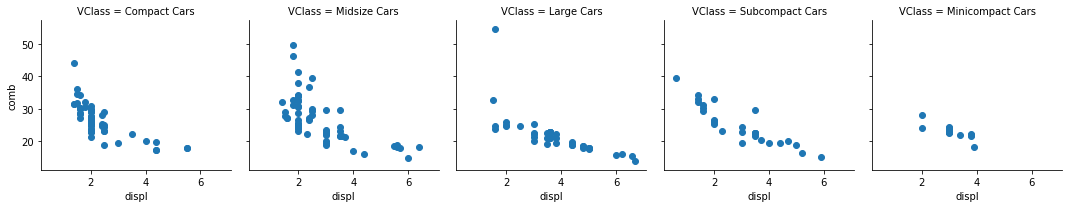

In [47]:
g = sns.FacetGrid(data = df, col = 'VClass')
g.map(plt.scatter, 'displ', 'comb')

<function matplotlib.pyplot.title(s, *args, **kwargs)>

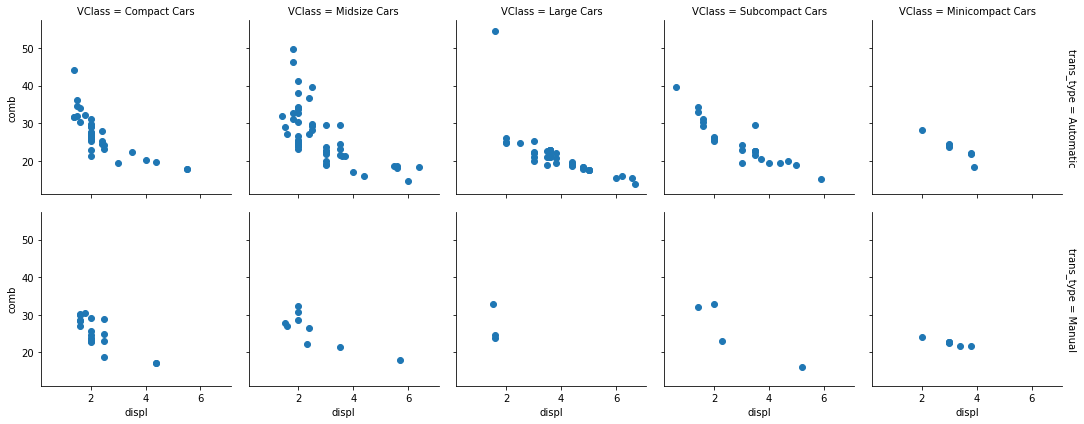

In [49]:
g = sns.FacetGrid(data = df, col = 'VClass', row = 'trans_type', margin_titles=True)
g.map(plt.scatter, 'displ', 'comb')
plt.title

## Other Adaptations of Bivariate pots

## Plot Matrices

In [50]:
df = pd.read_csv('pokemon.csv')
print (df.shape)
df.head(3)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100


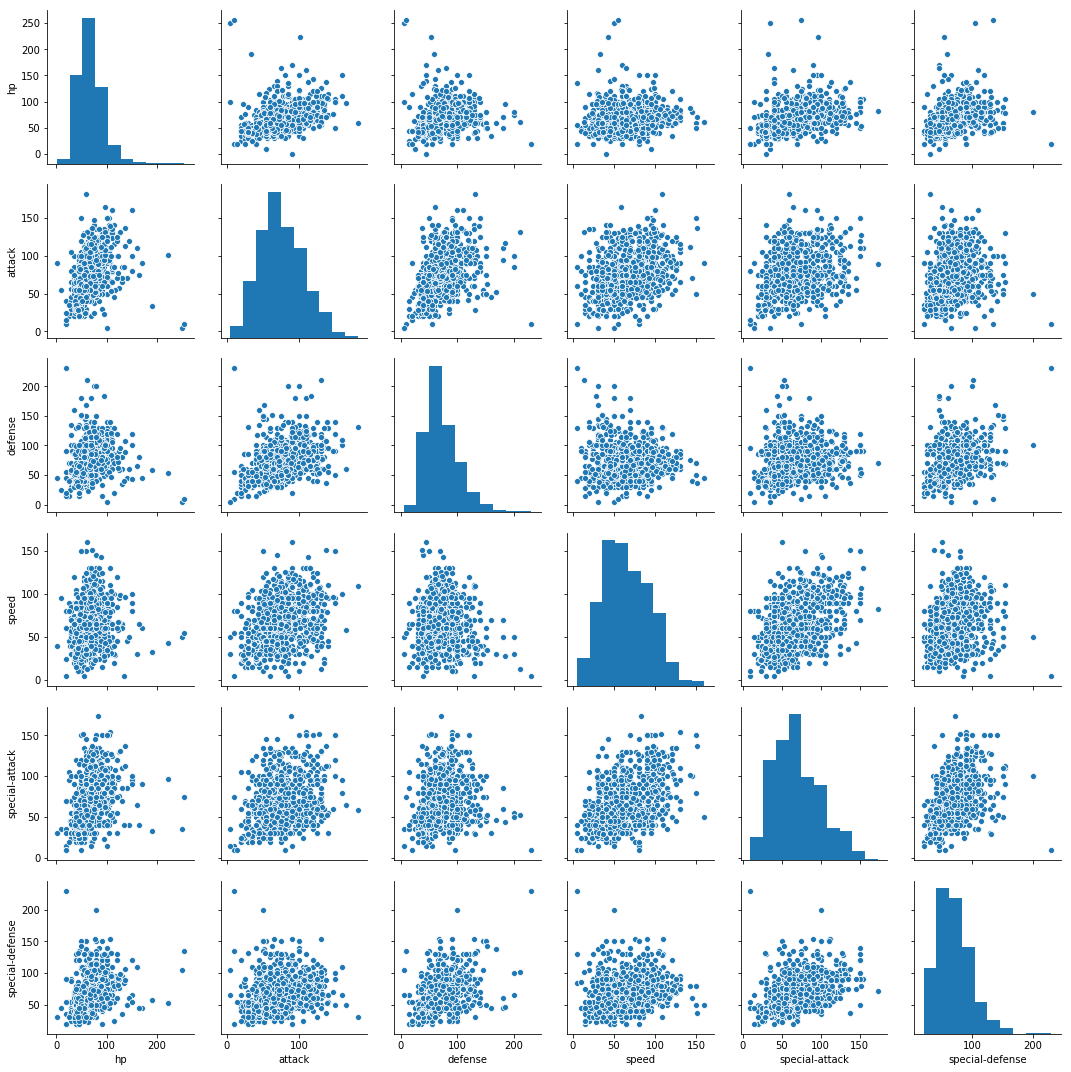

In [52]:
num_vars = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
sns.pairplot(data = df, vars = num_vars)

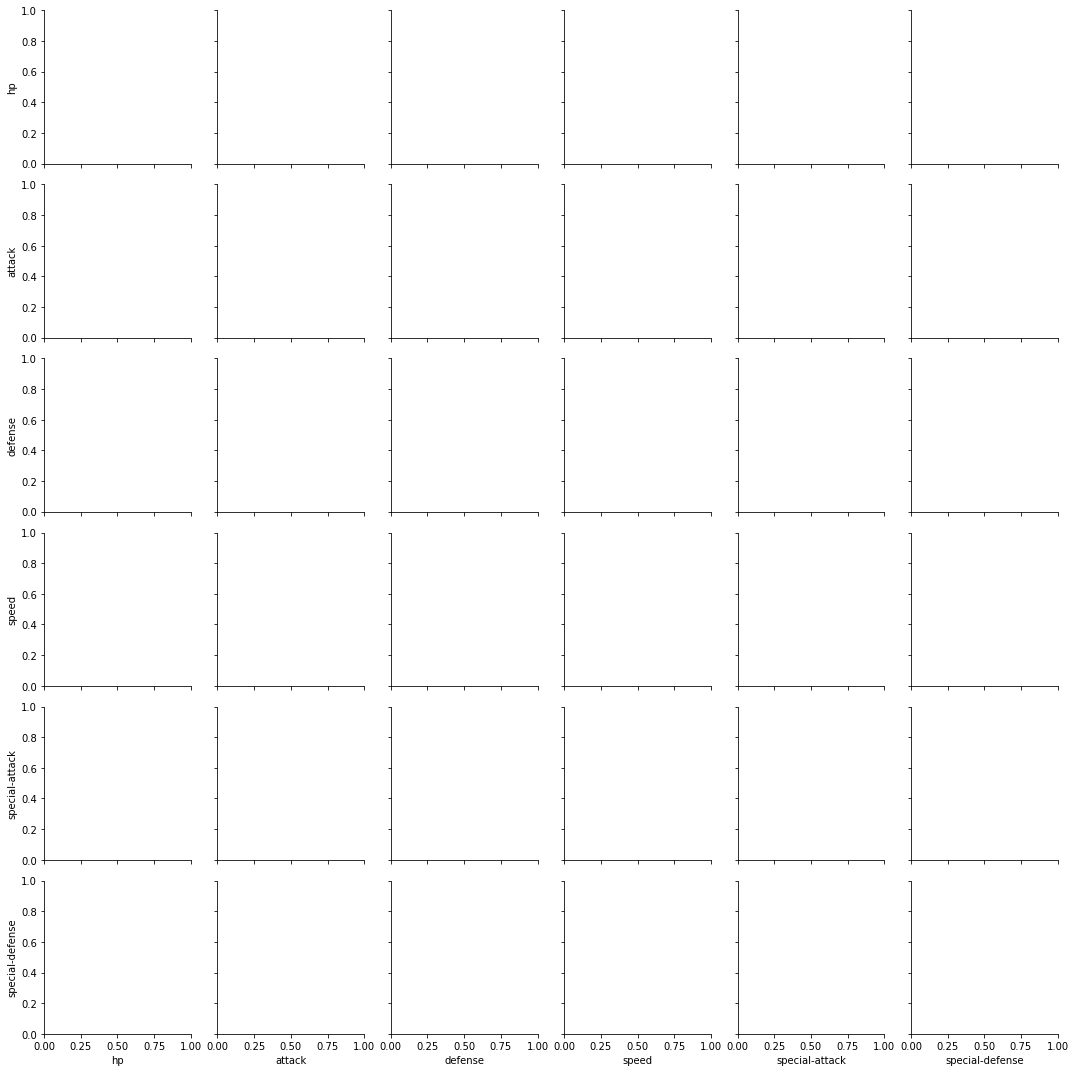

In [53]:
g = sns.PairGrid(data = df, vars = num_vars)

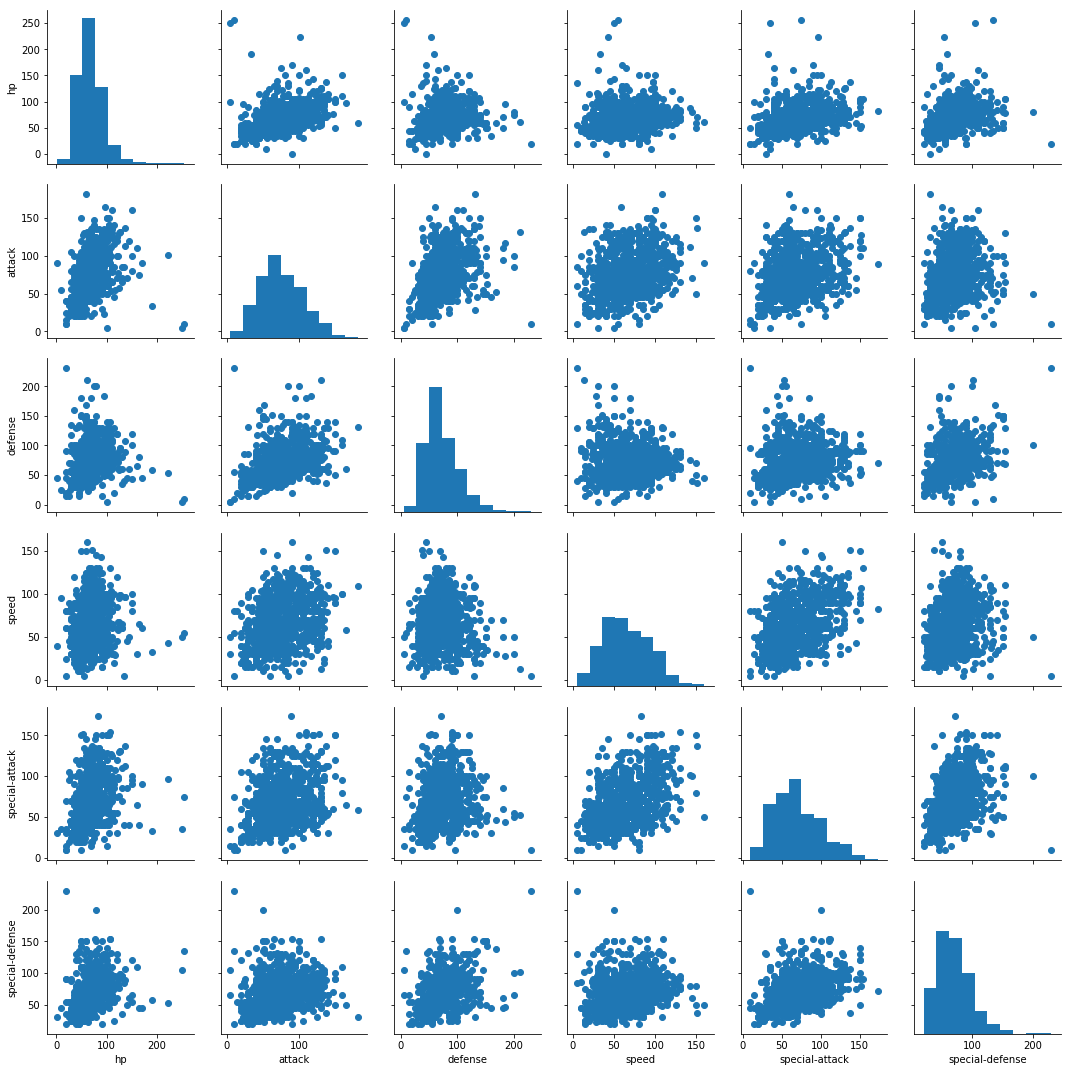

In [54]:
g = sns.PairGrid(data = df, vars = num_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

Flexiblity of PairGrid shines when you can define the custom plotting function to plot. as well as use categorical variable on different axis to disect the data better

C:\Users\agarwas3\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


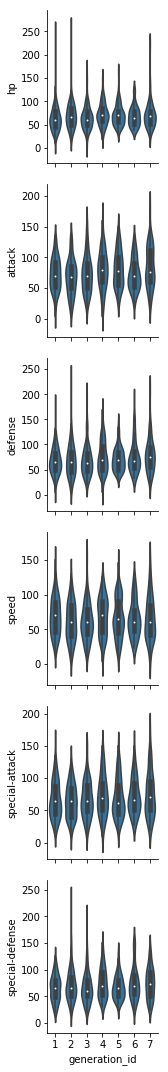

In [58]:
g= sns.PairGrid(data = df, x_vars = 'generation_id', y_vars = num_vars)
g.map(sns.violinplot)

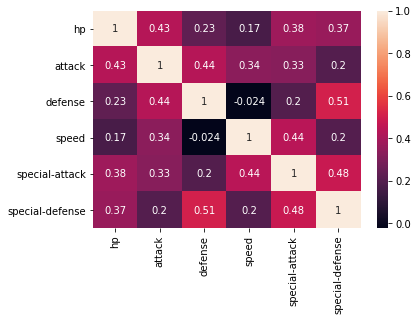

In [60]:
sns.heatmap(df[num_vars].corr(), annot=True)

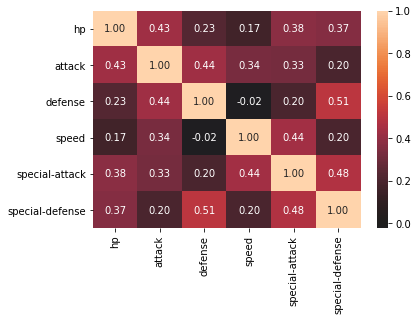

In [62]:
sns.heatmap(df[num_vars].corr(), fmt = '.2f', annot=True, center=0)